# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Masmur Toloni Harefa
- **Email:** masmurharefa03@gmail.com
- **ID Dicoding:** masmurharefa

## Menentukan Pertanyaan Bisnis

- Apakah ada perubahan pola penyewaan sepeda antara hari kerja, akhir pekan, dan hari libur?
- Apakah terdapat perbedaan jumlah penyewaan sepeda antara pengguna casual (tidak terdaftar) dan pengguna registered (terdaftar) pada hari libur, akhir pekan dan hari kerja?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Data Wrangling

###Gathering Data


In [2]:
day_df = pd.read_csv("/content/day.csv", delimiter=",")
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("/content/day.csv", delimiter=",")
hour_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


###Assessing data

In [4]:
day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
hour_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
#Melihat Jumlah Duplikasi
print("Jumlah duplikasi: ", day_df.duplicated().sum())
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


###Cleaning Data

In [9]:
#mengubah kolom dteday menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [10]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [11]:
hour_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis (EDA)

###Pertanyaan 1

array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'dteday'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>],
       [<Axes: title={'center': 'mnth'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weathersit'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'cnt'}>]], dtype=object)

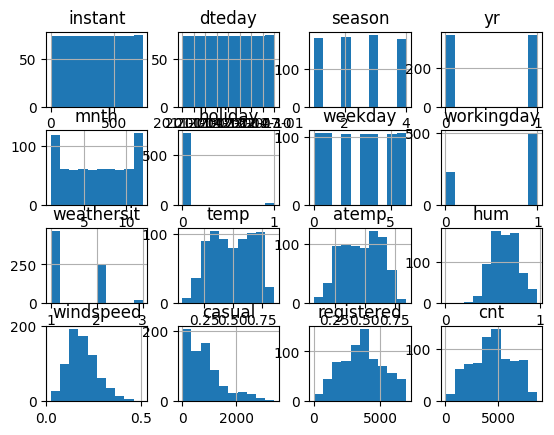

In [12]:
hour_df.hist()

array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'dteday'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>],
       [<Axes: title={'center': 'mnth'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weathersit'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'cnt'}>]], dtype=object)

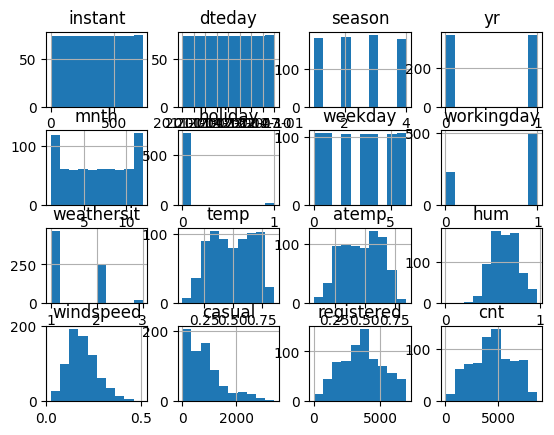

In [13]:
day_df.hist()

In [14]:
# Buat Kolom baru yang mengkategorikan hari libur, hari kerja dan akhir pekan
def categorize_day(row):
    if row['holiday'] == 1:
        return 'Hari Libur'
    elif row['workingday'] == 1:
        return 'Hari Kerja'
    else:
        return 'Akhir Pekan'


day_df['day_type'] = day_df.apply(categorize_day, axis=1)


# Mengumpulkan data untuk menemukan jumlah rata-rata persewaan berdasarkan jenis hari
rata_rata_penyewaan  = day_df.groupby('day_type')['cnt'].mean().reset_index()

rata_rata_penyewaan


,day_type,cnt
0,Akhir Pekan,4389.685714
1,Hari Kerja,4584.820000
2,Hari Libur,3735.000000


###Pertanyaan 2

In [15]:
# Membuat kolom baru untuk mengkategorikan hari sebagai 'Hari Kerja', 'Akhir Pekan', atau 'Libur'
def categorize_day2(row):
    if row['holiday'] == 1:
        return 'Hari Libur'
    elif row['workingday'] == 1:
        return 'Hari Kerja'
    else:
        return 'Akhir Pekan'

hour_df['day_type'] = hour_df.apply(categorize_day2, axis=1)

# Mengumpulkan data untuk membandingkan pengguna biasa dan pengguna terdaftar berdasarkan jenis hari (hari libur vs hari kerja)
rata_rata_casual_registered = hour_df.groupby(['day_type'])[['casual', 'registered']].mean().reset_index()
rata_rata_casual_registered


,day_type,casual,registered
0,Akhir Pekan,1401.776190,2987.909524
1,Hari Kerja,606.570000,3978.250000
2,Hari Libur,1064.714286,2670.285714


**Insight:**
- Pada pertanyaan 1, Ada perubahan pola penyewaan sepeda antara hari kerja, akhir pekan, dan hari libur. Penyewaan sepeda lebih banyak terjadi pada hari kerja dibandingkan dengan akhir pekan dan hari libur, kemungkinan karena banyak pengguna yang menggunakan sepeda sebagai alat transportasi untuk bekerja. Pada hari libur, penyewaan sepeda cenderung menurun, mungkin karena kegiatan atau rencana perjalanan masyarakat lebih sedikit dibandingkan pada hari kerja dan akhir pekan


- Pada pertanyaan 2, Pengguna casual cenderung lebih banyak menyewa sepeda pada akhir pekan dan hari libur dibandingkan dengan hari kerja. Pengguna registered lebih banyak menyewa sepeda pada hari kerja, yang mungkin menunjukkan bahwa mereka menggunakan sepeda sebagai transportasi utama untuk bekerja.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-16-754312a8e4ef>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rata_rata_penyewaan, x='day_type', y='cnt', palette='Blues_d')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When groupi

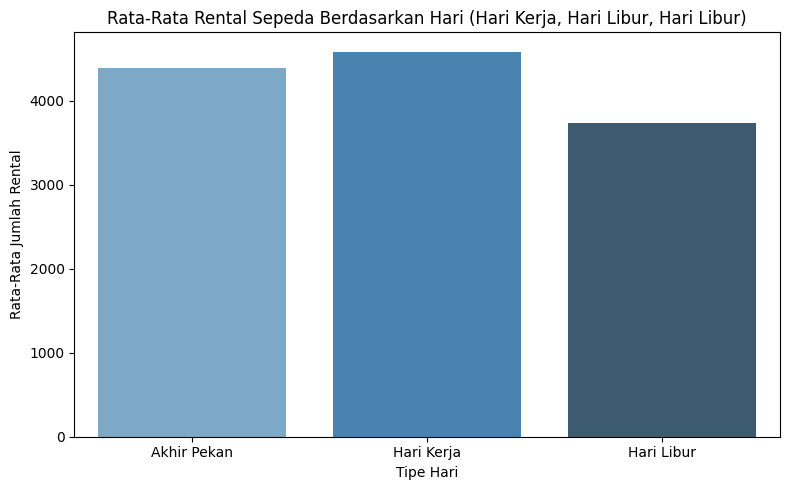

In [16]:
plt.figure(figsize=(8, 5))
sns.barplot(data=rata_rata_penyewaan, x='day_type', y='cnt', palette='Blues_d')
plt.title('Rata-Rata Rental Sepeda Berdasarkan Hari (Hari Kerja, Hari Libur, Hari Libur)', fontsize=12)
plt.ylabel('Rata-Rata Jumlah Rental')
plt.xlabel('Tipe Hari')
plt.tight_layout()
plt.show()

### Pertanyaan 2:

<Figure size 1000x600 with 0 Axes>

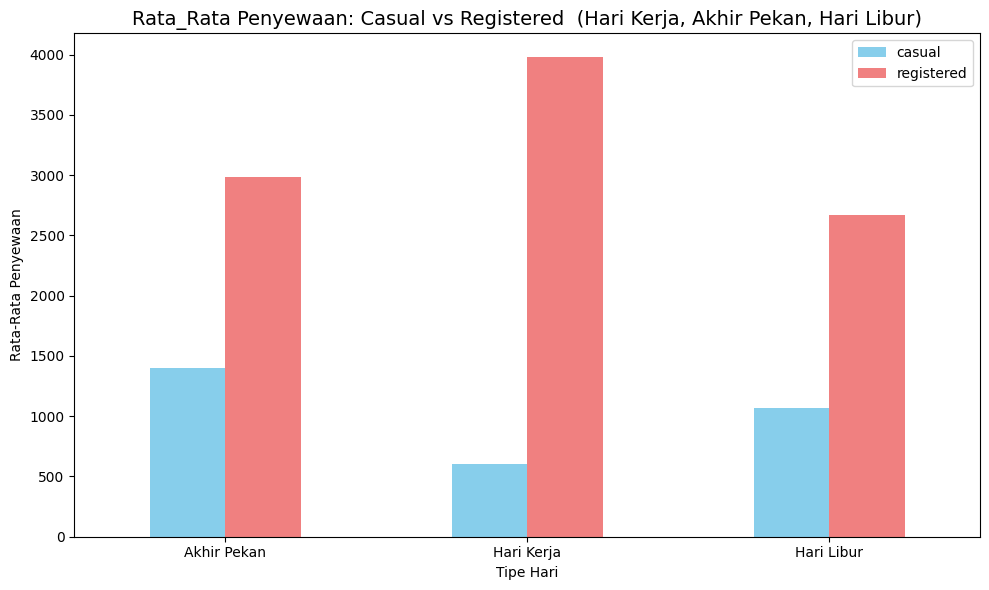

In [18]:
# Plotting perbandingan
plt.figure(figsize=(10, 6))
rata_rata_casual_registered.set_index('day_type')[['casual', 'registered']].plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightcoral'])

plt.title('Rata_Rata Penyewaan: Casual vs Registered  (Hari Kerja, Akhir Pekan, Hari Libur)', fontsize=14)
plt.ylabel('Rata-Rata Penyewaan')
plt.xlabel('Tipe Hari')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Insight:**
- Pada pertanyaan 1, visualisasi dari hasil analisis data ini menyatakan bahwa terdapat perbedaan penyewaan di hari kerja, akhir pekan dan hari libur
- Pada Pertanyaan 2, visualisasi dari hasil analisis data ini menyatakan bahwa pengguna casual dan pengguna terdaftar memiliki perbedaan polla peminjaman pada akhir pekan, hari kerja dan hari libur

## Analisis Lanjutan (Opsional)

## Conclusion

###Pertanyaan 1
**Apakah ada perubahan pola penyewaan sepeda antara hari kerja, akhir pekan, dan hari libur?**

Berdasarkan analisis data yang sudah di visualisasi, jawabannya adalah **ada perbedaan** dimana pengguna lebih banyak meminjam di hari kerja, kemudian di akhir pekan dan paling sedikit menyewa pada saat hari libur. Hal ini menyatakan bahwa penyewaan sepeda umumnya dilakukan pada saat hari kerja atau pada saat akhir pekan.

###Pertanyaan 2

**Apakah terdapat perbedaan jumlah penyewaan sepeda antara pengguna casual (tidak terdaftar) dan pengguna registered (terdaftar) pada hari libur, akhir pekan dan hari kerja?**

Berdasarkan hasil analisis data yang telah di visualisasi, penyewa casual yang tidak terdaftar secara general **lebih sedikit** melakukan penyewaan dibandingkan penyewa yang sudah terdaftar. Pengguna terdaftar lebih sering menyewa pada hari kerja sedangkan penyewa casual lebih sering mendaftar pada akhir pekan. Terdapat perbandingan yang signifikan pada hari kerja dimana pengguna terdaftar lebih sering melakukan penyewaan dibandingkan pengguna casual yang lebih jarang melakukan penyewaan pada hari kerja.